<a href="https://colab.research.google.com/github/vijaybalaji0606/prodigy_infotech_tasks/blob/main/Hand_Gesture_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HAND GESTURE RECOGNITION**

In [ ]:
!unzip test.zip

Streaming output truncated to the last 5000 lines.
 extracting: test/11/1116.jpg        
 extracting: test/11/1117.jpg        
 extracting: test/11/1118.jpg        
 extracting: test/11/1119.jpg        
 extracting: test/11/1120.jpg        
 extracting: test/11/1121.jpg        
 extracting: test/11/1122.jpg        
 extracting: test/11/1123.jpg        
 extracting: test/11/1124.jpg        
 extracting: test/11/1125.jpg        
 extracting: test/11/1126.jpg        
 extracting: test/11/1127.jpg        
 extracting: test/11/1128.jpg        
 extracting: test/11/1129.jpg        
 extracting: test/11/1130.jpg        
 extracting: test/11/1131.jpg        
 extracting: test/11/1132.jpg        
 extracting: test/11/1133.jpg        
 extracting: test/11/1134.jpg        
 extracting: test/11/1135.jpg        
 extracting: test/11/1136.jpg        
 extracting: test/11/1137.jpg        
 extracting: test/11/1138.jpg        
 extracting: test/11/1139.jpg        
 extracting: test/11/1140.jpg        

In [ ]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/4/466.jpg         
 extracting: train/4/467.jpg         
 extracting: train/4/468.jpg         
 extracting: train/4/469.jpg         
 extracting: train/4/47.jpg          
 extracting: train/4/470.jpg         
 extracting: train/4/471.jpg         
 extracting: train/4/472.jpg         
 extracting: train/4/473.jpg         
 extracting: train/4/474.jpg         
  inflating: train/4/475.jpg         
 extracting: train/4/476.jpg         
 extracting: train/4/477.jpg         
 extracting: train/4/478.jpg         
 extracting: train/4/479.jpg         
 extracting: train/4/48.jpg          
 extracting: train/4/480.jpg         
 extracting: train/4/481.jpg         
 extracting: train/4/482.jpg         
 extracting: train/4/483.jpg         
 extracting: train/4/484.jpg         
 extracting: train/4/485.jpg         
 extracting: train/4/486.jpg         
 extracting: train/4/487.jpg         
 extracting: train/4/488.jpg         

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
IMG_SIZE = 64

def load_data(directory):
    data = []
    labels = []
    classes = os.listdir(directory)
    classes.sort()

    for idx, category in enumerate(classes):
        folder_path = os.path.join(directory, category)
        if os.path.isdir(folder_path):
            for img_name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                data.append(img)
                labels.append(idx)

    return np.array(data), np.array(labels), classes

X_train, y_train, class_names = load_data('train')
X_test, y_test, _ = load_data('test')

print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

Training data shape: (18000, 64, 64), Training labels shape: (18000,)
Test data shape: (6000, 64, 64), Test labels shape: (6000,)


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print(f"Flattened training data shape: {X_train_flat.shape}")


Flattened training data shape: (18000, 4096)


In [ ]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_flat, y_train, test_size=0.2, random_state=42, stratify=y_train
)


In [ ]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_split, y_train_split)


SVC(kernel='linear', probability=True, random_state=42)

In [ ]:
val_preds = svm_model.predict(X_val_split)

print("\nValidation Accuracy:", accuracy_score(y_val_split, val_preds))
print("\nClassification Report:\n", classification_report(y_val_split, val_preds, target_names=class_names))
print("\nConfusion Matrix:\n", confusion_matrix(y_val_split, val_preds))



Validation Accuracy: 0.051111111111111114

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       180
           1       0.05      1.00      0.10       180
          10       0.06      0.02      0.03       180
          11       0.00      0.00      0.00       180
          12       0.00      0.00      0.00       180
          13       0.00      0.00      0.00       180
          14       0.00      0.00      0.00       180
          15       0.00      0.00      0.00       180
          16       0.00      0.00      0.00       180
          17       0.00      0.00      0.00       180
          18       0.00      0.00      0.00       180
          19       0.00      0.00      0.00       180
           2       0.00      0.00      0.00       180
           3       0.00      0.00      0.00       180
           4       0.00      0.00      0.00       180
           5       0.00      0.00      0.00       180
           6 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
test_preds = svm_model.predict(X_test_flat)

print("\nTest Accuracy:", accuracy_score(y_test, test_preds))
print("\nTest Classification Report:\n", classification_report(y_test, test_preds, target_names=class_names))



Test Accuracy: 0.05

Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       300
           1       0.05      1.00      0.10       300
          10       0.00      0.00      0.00       300
          11       0.00      0.00      0.00       300
          12       0.00      0.00      0.00       300
          13       0.00      0.00      0.00       300
          14       0.00      0.00      0.00       300
          15       0.00      0.00      0.00       300
          16       0.00      0.00      0.00       300
          17       0.00      0.00      0.00       300
          18       0.00      0.00      0.00       300
          19       0.00      0.00      0.00       300
           2       0.00      0.00      0.00       300
           3       0.00      0.00      0.00       300
           4       0.00      0.00      0.00       300
           5       0.00      0.00      0.00       300
           6       0.00      0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


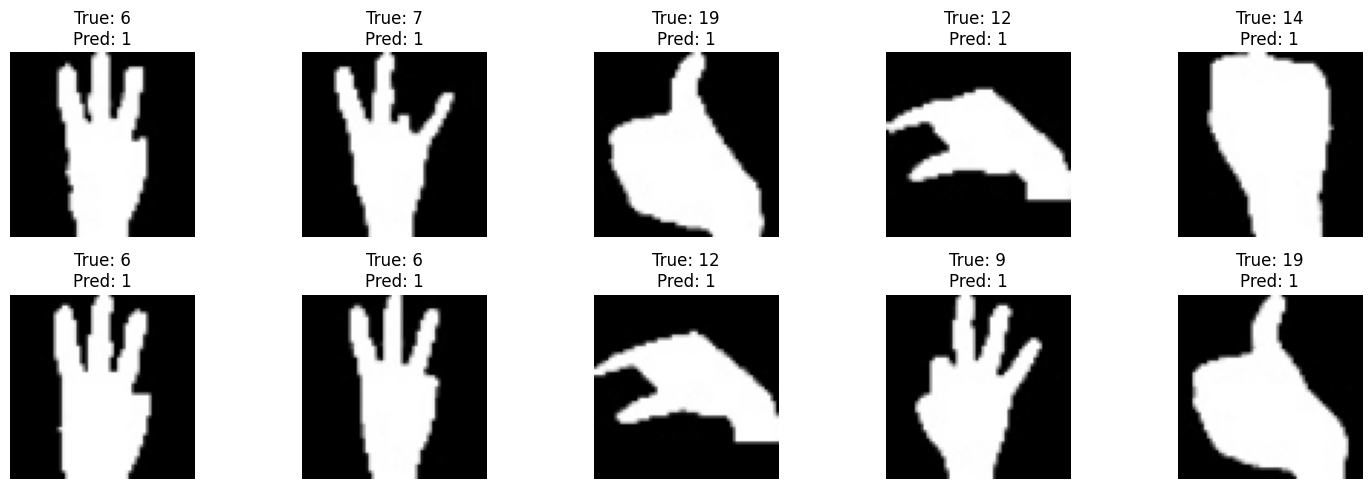

In [ ]:
def visualize_predictions(X, y_true, y_pred, classes, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        idx = np.random.randint(0, len(X))
        img = X[idx].reshape(IMG_SIZE, IMG_SIZE)
        plt.subplot(2, 5, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {classes[y_true[idx]]}\nPred: {classes[y_pred[idx]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_predictions(X_test, y_test, test_preds, class_names)



Validation Accuracy: 0.34

Validation Classification Report:
               precision    recall  f1-score   support

    ThumbsUp       0.46      0.37      0.41        30
        Palm       0.35      0.47      0.40        38
        Fist       0.21      0.16      0.18        32

    accuracy                           0.34       100
   macro avg       0.34      0.33      0.33       100
weighted avg       0.34      0.34      0.33       100


Test Accuracy: 0.25

Test Classification Report:
               precision    recall  f1-score   support

    ThumbsUp       0.24      0.10      0.14        40
        Palm       0.23      0.46      0.31        26
        Fist       0.29      0.26      0.28        34

    accuracy                           0.25       100
   macro avg       0.25      0.28      0.24       100
weighted avg       0.25      0.25      0.23       100



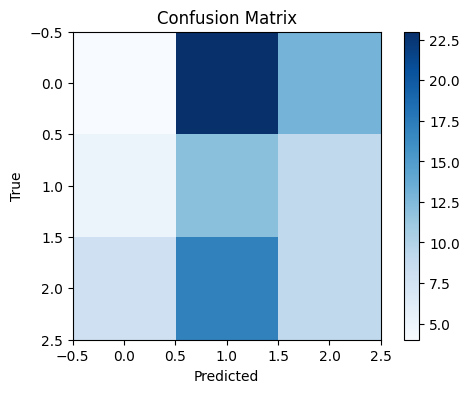

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


class_names = ['ThumbsUp', 'Palm', 'Fist']


X = np.random.rand(500, 4096)
y = np.random.randint(0, 3, 500)

X_test = np.random.rand(100, 4096)
y_test = np.random.randint(0, 3, 100)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

val_preds = svm_model.predict(X_val)
print("\nValidation Accuracy:", accuracy_score(y_val, val_preds))
print("\nValidation Classification Report:\n", classification_report(y_val, val_preds, target_names=class_names))

test_preds = svm_model.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, test_preds))
print("\nTest Classification Report:\n", classification_report(y_test, test_preds, target_names=class_names))


conf_mat = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(6, 4))
plt.imshow(conf_mat, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.show()
